<a href="https://colab.research.google.com/github/MateuszP137/EEML-CW/blob/main/01_ML_PLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Learning Algorithm


---


This tutorial explores the concept of the perceptron. While the perceptron itself is relatively straightforward, it is not commonly used as a standalone method in modern machine learning. However, it serves as a foundational building block for more advanced machine learning models, such as neural networks, which have paved the way for the field of deep learning.

The Perceptron
--------------
The perceptron is a binary classifier that takes an input vector $\mathbf{x} = [x_1, x_2, \dotsc, x_n]^T$ and produces a binary prediction $y \in \{-1, +1\}$. It achieves this by computing a scalar value through the dot product of the input vector elements and learned weights $\mathbf{w} = [w_1, w_2, \dotsc, w_n]^T$, and then summing these products. This operation is represented as the vector dot product $\mathbf{w}^T \mathbf{x}$. Subsequently, the perceptron compares the scalar value $\mathbf{w}^T \mathbf{x}$ with a threshold $t$. If it's above the threshold, the perceptron predicts $y = +1$; otherwise, it predicts $y = -1$. This can be formulated as a linear predictor:

$$
y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge t \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} < t
      \end{cases}
$$

Incorporating Bias
-------------------
To eliminate the threshold parameter, a common technique is to include it as a bias. By appending $x_0 = 1$ to the input $\mathbf{x}$, we have $\mathbf{x} = [x_0, x_1, x_2, \dotsc, x_n]^T$ and $\mathbf{w} = [w_0, w_1, w_2, \dotsc, w_n]^T$. The weight $w_0$ now represents the threshold ($w_0 = -t$), as $\mathbf{w}^T \mathbf{x} = \sum_{i=1}^n w_i x_i + w_0 x_0$ with $x_0 = 1$. The linear predictor becomes:

$$
y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge 0 \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} < 0
      \end{cases} = \text{sign}(\mathbf{w}^T \mathbf{x})
$$

The perceptron architecture can be illustrated in the below figure:

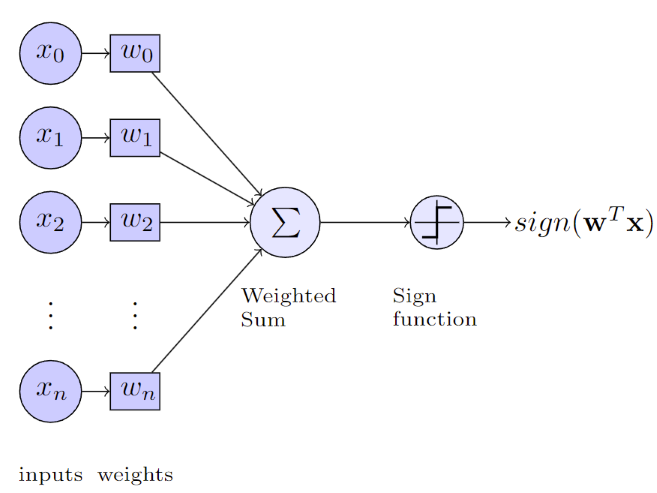


Learning Process
-----------------
The learning process of the perceptron involves iterative weight updates until a decision boundary is reached (in cases of linearly separable data). The initial weights can be set to a zero vector, i.e., $\mathbf{w} = \mathbf{0}$. The algorithm processes each data point $x_i$ and classifies it using the current weights as either $+1$ or $-1$ through $\text{sign}(\mathbf{w}^T \mathbf{x})$. If the classification is incorrect (i.e., $\text{sign}(\mathbf{w}^T \mathbf{x}) \ne y_i$), the weights are updated using $\mathbf{w} \leftarrow \mathbf{w} + y_i x_i$. The number of iterations can also be specified.

For deeper insight, this tutorial provides Python code (a widely used language in machine learning) to implement these algorithms, along with informative visualisations.



> The code in this tutorial is adopted from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015 (page 25), with modifications.



# Iris dataset

In this tutorial, we will use the famous Iris flower dataset to assess the performance of the perceptron. The Iris flowers dataset, an iconic benchmark in the field, comprises an assortment of floral specimens. Within this dataset, each individual specimen is characterised by four distinct features: the length and width of both sepals and petals. A total of 50 samples from three unique Iris species - Versicolor, Virginica, and Setosa - contribute to this dataset, each adding their own unique traits and attributes to the mix. This array of diverse floral profiles forms the basis for our exploration into the capabilities of the perceptron model. Below is a picture of the the Iris flowers that we will deal with.

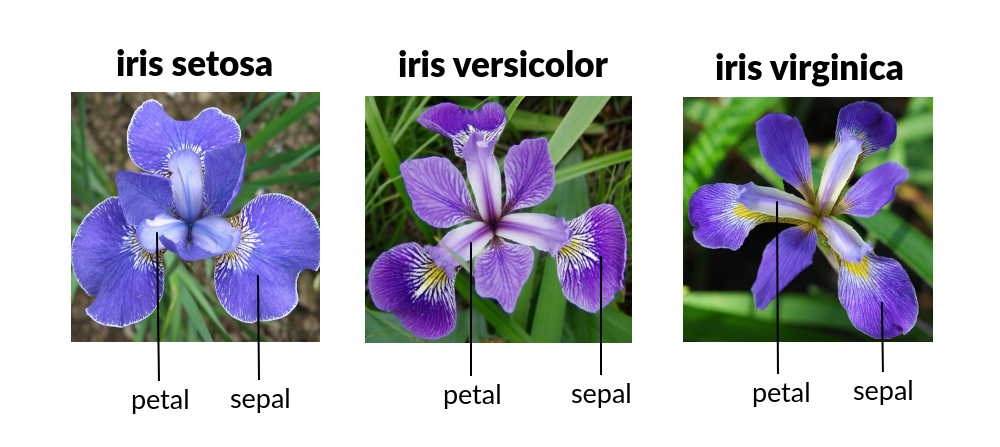

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [38]:
# We can use the sklearn package in order to import the data directly. Or you can dowload it as csv file and import it.
from sklearn.datasets import load_iris
iris = load_iris()

# This command generates a decsription of the dataset if you need more information
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


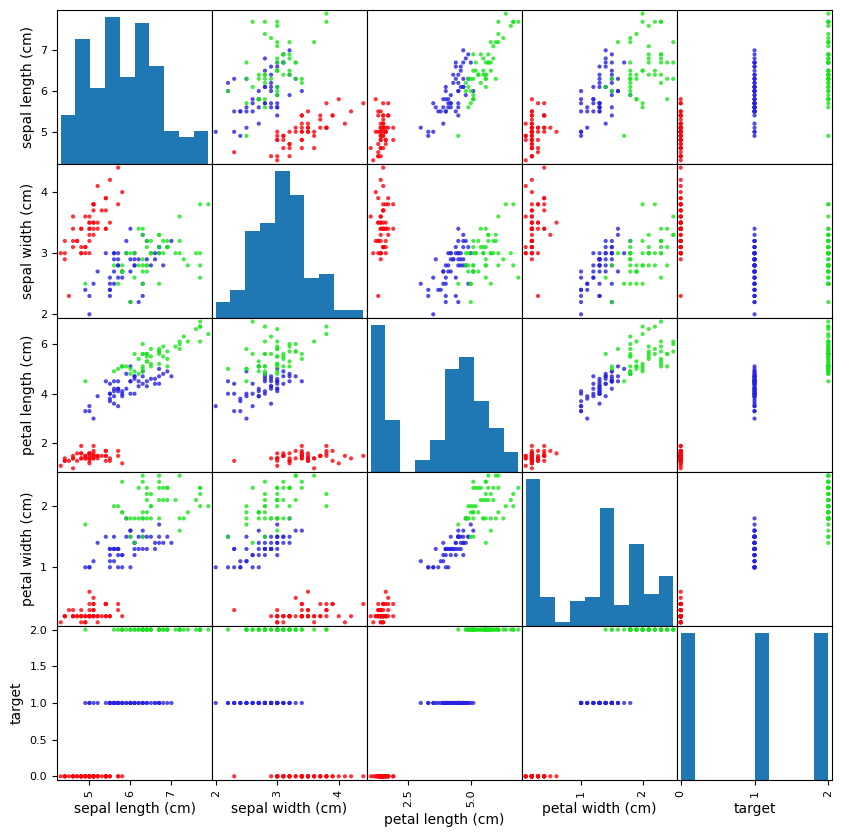

In [39]:
# You can visulaise the Iris data using the following cell for better understanding
# Note: the last column of this data represesent the labels, where 0 -> Setosa, 1 -> Versicolor, 2 -> Virginica

from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

"""
Generate a scatter matrix plot to visualize the relationships between different features in the Iris dataset.
Each subplot in the matrix shows the scatter plot between two different features, while histograms on the diagonal
show the distribution of each individual feature. The color of points in the scatter plots is determined by the
corresponding class labels (Setosa, Versicolor, Virginica), where each class is assigned a distinct color.
The plot provides insights into possible patterns, correlations, and separations among features, aiding in data exploration.
"""

iris_data["target"] = iris['target']
color_dictionary = {1: "#FE010A", 2: "#2722DD", 3: "#1BE41D"}
colors = iris_data["target"].map(lambda x: color_dictionary.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.8, figsize=(10, 10), diagonal='hist')

iris_data

#scroll down to see the plots

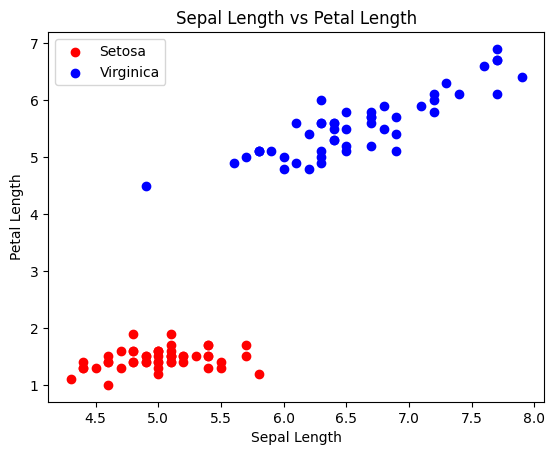

In [40]:
"""
We will use the perceptron as binary classifier, therefore we will choose two classes from the three. Let it be Setosa
and Virginica. Furthermore, for better data visualisation, we will consider two features; petal length and sepal length
this will make us see the features in 2D plot.
"""

# The following line of code will include the labels for Setosa and Virginica classes in one array and discard the Versicolor.
setosa_label = iris_data.iloc[0:50,4].values
virginica_label = iris_data.iloc[100:150,4].values
labels = np.concatenate((setosa_label,virginica_label))

"""
Note that from the original data Setosa is labelled as 0 and Virginica is labelled as 2. In order to match the labels
with our defined sign function for binary classification, we change the labels such as Setosa class has label -1 and
Virginica has a label 1 using the following code
"""
y = np.where(labels == 0, -1, 1)

# The following line of code will consider the two features (petal length and sepal length only) for the Setosa and Virginica
# classes and combine the features in one array.

X_setosa = iris_data.iloc[0:50, [0,2]]
X_virginica = iris_data.iloc[100:150, [0,2]]
X = np.concatenate((X_setosa,X_virginica))

# We can plot the features in 2D plot such that the sepal length feature is represented by x-axis
# and petal length  is represented by y-axis

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Virginica')
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

# PLA code

Having prepared our data, we are now ready to take a look at our first learning algorithm - PLA. The PLA is an iterative algorithm which iterates over each data points from the dataset.

Initial weights of the perceptron can be set to a vector of zeros, i.e. $\mathbf{w} = \mathbf{0}$. PLA then takes each data point $x_i$ and classifies it using the current perceptron weights as either $+1$ or $-1$ using $sign(\mathbf{w}^T \mathbf{x})$. The perceptron update rule is given as $\mathbf{w} \leftarrow \mathbf{w} + y_i x_i$. Note that the update is done only if the predicted label is incorrect and the weights are updated in the opposite direction to the prediction i.e., the predicted label was $+1$ while the true one was $-1$ and vice versa. In this way the error should decrease in the next iteration. After the update of the  weights, we iterate through the rest of the points and update the weights again if necessary. If the dataset is separable i.e. all data points can be classified correctly, then the algorithm will eventually iterate through all the  data points without any misclassification.

In [41]:
def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)

In [42]:
def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]

In [43]:
def plot_boundary(W, X):
    """Function to plot the boundary defined by the weights. Given equation."""
    """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""

    # Calculate the slope and y-intercept of the boundary line
    slope = -W[1] / W[2]
    intercept = -W[0] / W[2]

    # Get the minimum and maximum x values from the dataset
    x_min = np.min(X[:, 0])
    x_max = np.max(X[:, 0])

    # Generate points for the boundary line to cover the whole plot
    x_vals = np.array([x_min, x_max])
    y_vals = slope * x_vals + intercept

    # This part here define the x-axis and y-axis style according to the data we are using
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='Virginica')
    plt.title("Sepal Length vs Petal Length")
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend(loc='upper left')

    # Plot the line using the calculated points
    plt.plot(x_vals, y_vals, 'black')

    plt.show()

In [44]:
def plot_errors(error):
    """ Function to plot number of misclassified samples """
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()

In [45]:
def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
         #     update = target - predict(W, xi)
         #     W += 0.5*update*np.append(1,xi)
              if predict(W, xi) != target:
                  W = W + target * np.append(1,xi)
            # errors on whole dataset
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors)
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            print("Misclassified Samples: ", errors)
            plot_boundary(W,X) # When weights are updated we plot the boundary
        plot_errors(errors_)

Iteration:  1
Weights:  [0.  1.2 4.6]
Misclassified Samples:  50


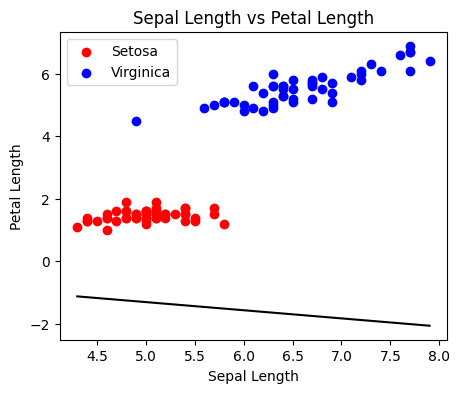

Iteration:  2
Weights:  [0.  2.4 9.2]
Misclassified Samples:  50


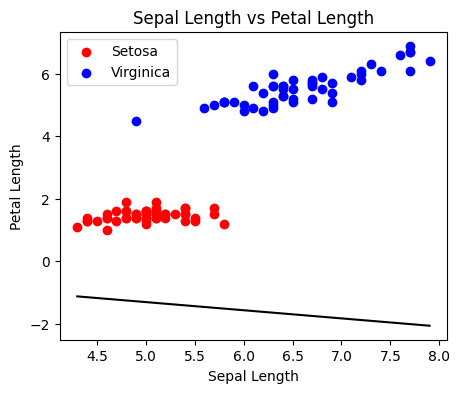

Iteration:  3
Weights:  [-1.  -1.2 11.9]
Misclassified Samples:  50


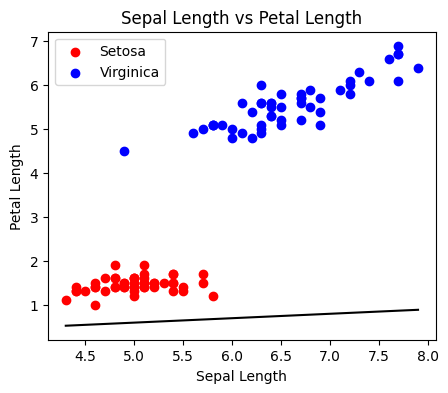

Iteration:  4
Weights:  [-2.  -6.3 10.5]
Misclassified Samples:  0


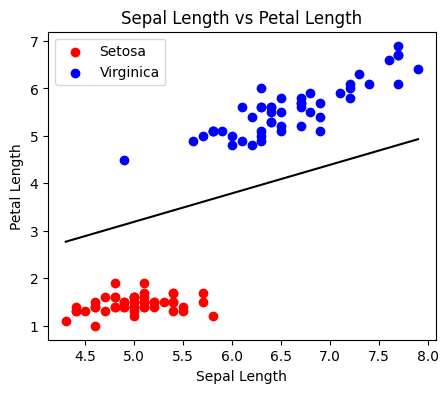

Iteration:  5
Weights:  [-2.  -6.3 10.5]
Misclassified Samples:  0


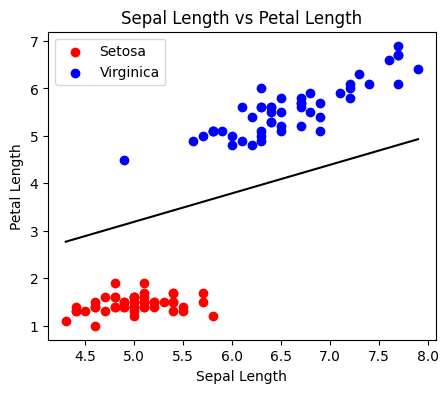

Iteration:  6
Weights:  [-2.  -6.3 10.5]
Misclassified Samples:  0


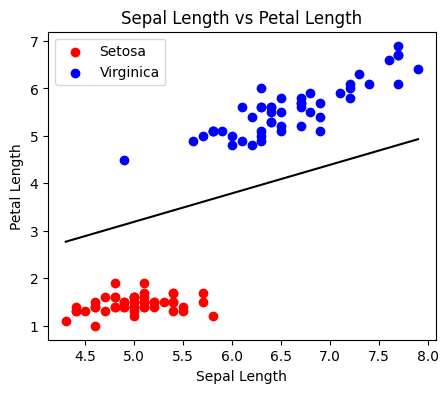

Iteration:  7
Weights:  [-2.  -6.3 10.5]
Misclassified Samples:  0


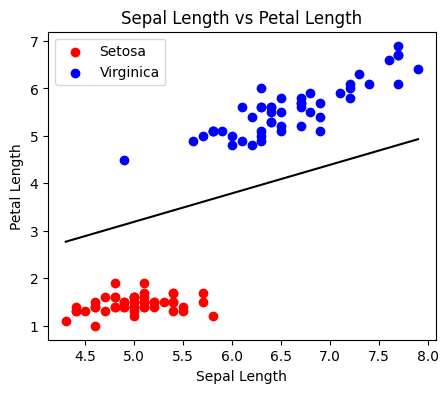

Iteration:  8
Weights:  [-2.  -6.3 10.5]
Misclassified Samples:  0


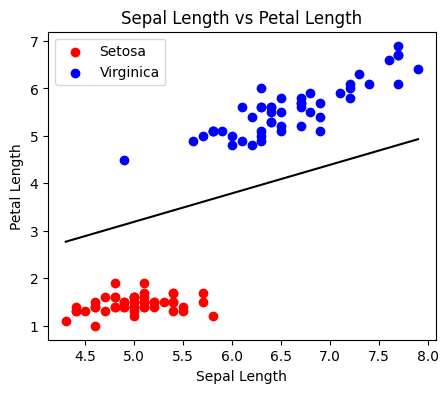

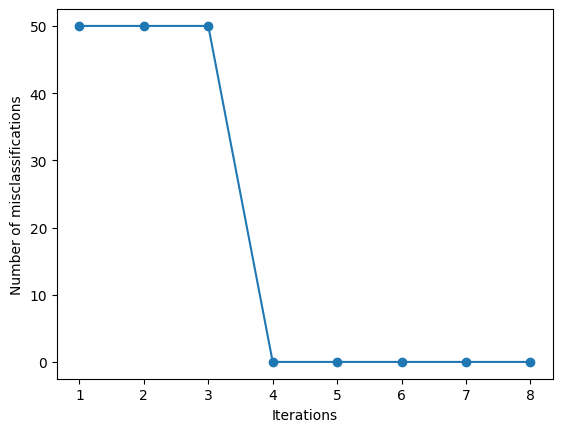

In [46]:
n_iter=8
fit(n_iter, X, y)

## Task 1 [40 marks]

**Perceptron Algorithm for Setosa vs. Versicolor Classification**

In this task, we will replicate the previous steps of the tutorial to perform binary classification between the Setosa and Versicolor classes using the same two features, namely petal length and sepal length. Your report should include the following components:

### Steps to Follow:

1. **Data Selection:**
   - Choose the Setosa and Versicolor classes from the Iris dataset.
   - Select the petal length and sepal length features as done in the previous task.

2. **Data Visualisation:**
   - Generate a plot that clearly demonstrates the linear separability of the Setosa and Versicolor classes based on the selected features.

3. **Perceptron Algorithm Execution:**
   - Implement the perceptron algorithm for the Setosa vs. Versicolor classification task.
   - Specify the number of iterations to perform during the algorithm execution.

4. **Misclassification Analysis:**
   - Create a plot illustrating the change in misclassified samples across the iterations of the perceptron algorithm.

5. **Final Weight Reporting:**
   - Report the final weight values obtained as a result of the perceptron algorithm.

6. **Code Showcase:**
   - Include the code segments that you modified or added for each step of the process.
   - Discuss the specific adaptations you made to the code to suit the Setosa vs. Versicolor classification.


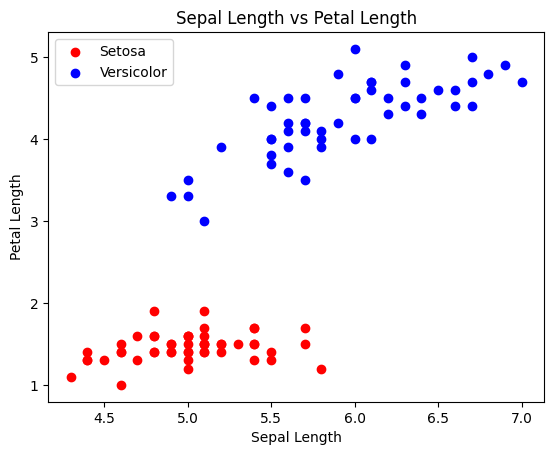

In [47]:
setosa_label = iris_data.iloc[0:50,4].values
versicolor_label = iris_data.iloc[50:100,4].values    # Changed indices to versicolor
labels = np.concatenate((setosa_label, versicolor_label))

y = np.where(labels == 0, -1, 1)

X_setosa = iris_data.iloc[0:50, [0,2]]
X_versicolor = iris_data.iloc[50:100, [0,2]]
X = np.concatenate((X_setosa,X_versicolor))

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Versicolor')
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

Iteration:  1
Weights:  [0.  1.9 3.3]
Misclassified Samples:  50


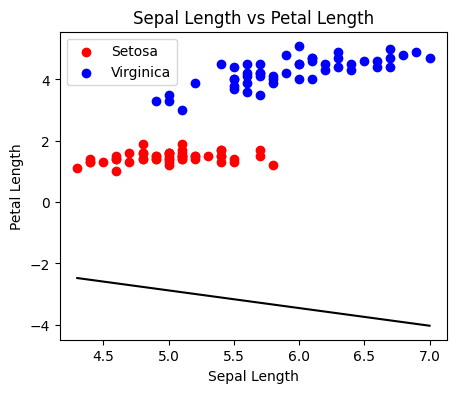

Iteration:  2
Weights:  [0.  3.8 6.6]
Misclassified Samples:  50


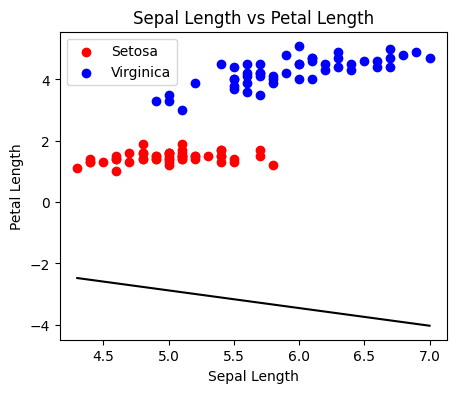

Iteration:  3
Weights:  [-1.   1.1  8.4]
Misclassified Samples:  50


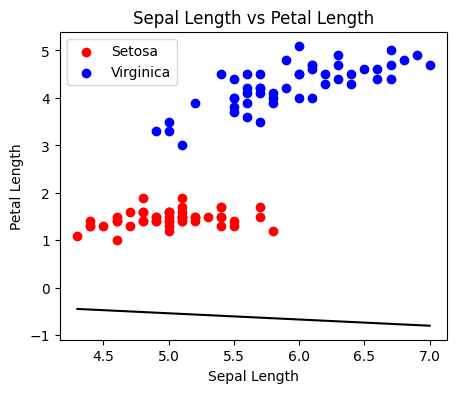

Iteration:  4
Weights:  [-1.   1.7 10.5]
Misclassified Samples:  50


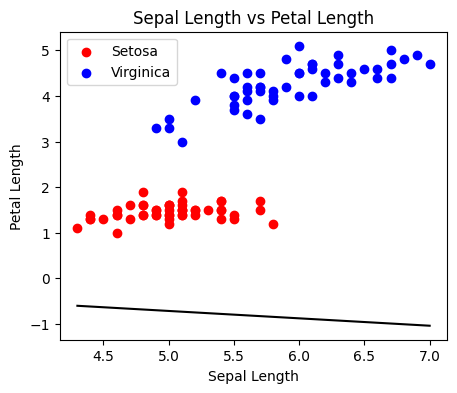

Iteration:  5
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


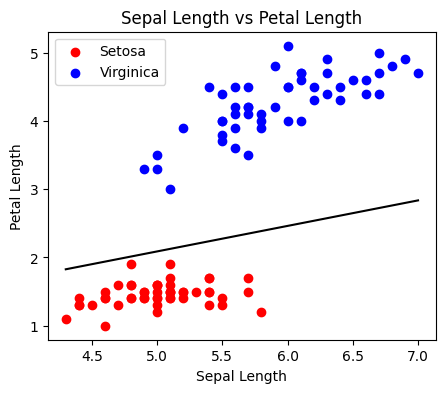

Iteration:  6
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


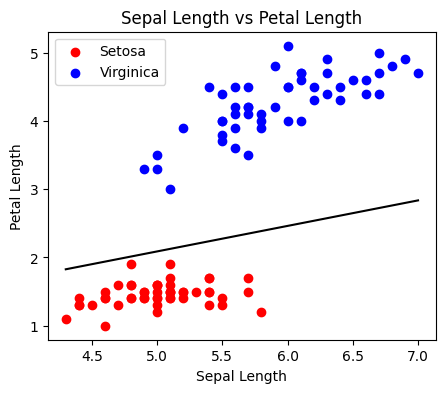

Iteration:  7
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


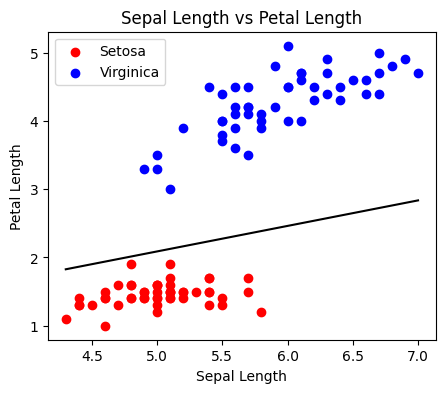

Iteration:  8
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


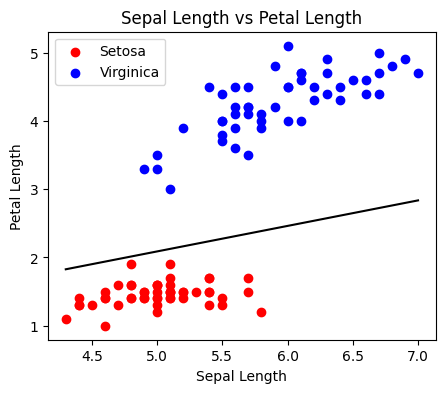

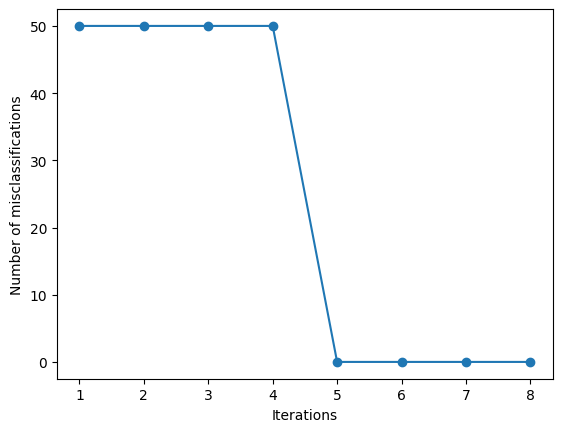

In [48]:
n_iter=8
fit(n_iter, X, y)

# Pocket Algorithm for perceptron

The Pocket Algorithm is an advanced version of the Perceptron algorithm designed to handle scenarios where data is not linearly separable and requires classification with minimal error. While the Perceptron focuses on linear classification, the Pocket Algorithm extends this approach to find a hyperplane that best separates the data while minimizing misclassification errors.

The key features of the Pocket Algorithm include:

- Unlike the Perceptron, which updates weights for each misclassification, the Pocket Algorithm maintains a "pocket" or memory of the best-performing weights encountered during training.
- This memory allows the algorithm to converge to a solution that might not be optimal for a linearly separable dataset but works better overall for non-linearly separable data.

### Suggested algorithm Steps:

1. **Initialization:**
   - Initialize the weight vector `W` randomly or to zeros.
   - Initialize the "pocket" weight vector `W_pocket` to zeros.

2. **Iteration:**
   - For each data point `x_i` in the training dataset:
     - Calculate the activation value `a = W^T * x_i`.
     - Predict the class label using the sign function: `y_pred = sign(a)`.
     - Compare the predicted label `y_pred` with the true label `y_i`.
     - If the prediction is incorrect:
       - Update the current weight vector `W` using the perceptron update rule.
       - Calculate the misclassification error on the entire dataset using the current `W`.
       - If the error is lower than the best error encountered so far (stored in `W_pocket`), update `W_pocket` with the current `W`.

3. **Termination:**
   - The algorithm continues iterating through the dataset until a predetermined number of iterations is reached or until the desired accuracy is achieved.

4. **Final Output:**
   - The final weight vector `W_pocket` represents the best-performing weights encountered during the iterations.
   - This weight vector can be used for making predictions on new, unseen data.

By "remembering" the best weight vector encountered during training, the Pocket Algorithm is effective for datasets that aren't linearly separable.

## Task 2 [60 marks]

Consider the Versicolor and Virginica classes using the same features (petal length and sepal length) as before. Unlike previous cases, these classes are not linearly separable. The perceptron classifier cannot effectively separate the classes using a single line as seen previously. In this analysis, we will:

1. **Plot Non-Linear Separability:**
   - Begin by visualizing the classes to showcase that they are not linearly separable using the selected features.

2. **Pocket Algorithm Implementation:**
   - Revise the PLA code to transform it into the Pocket Algorithm.
   - The Pocket Algorithm will help us find the best weights that result in minimal misclassification errors.

3. **Running the Pocket Algorithm:**
   - Execute the Pocket Algorithm for a larger number of iterations (e.g., 100) to effectively address the non-linear separability.
   - During these iterations, observe how the decision boundary evolves as the weights are updated.

4. **Plotting Misclassification Evolution:**
   - Create a plot illustrating how the number of misclassified samples changes with each iteration. Dispaly at least 3 plots showing differet phases of the iterations on how the decision boundary is changing (i.e one plot when it is is still intializing, a second plot to show the best iteration and a last plot showing an iteration when the decision boundary diverges again).
   - This visual representation will highlight the effectiveness of the Pocket Algorithm in minimizing classification errors.

5. **Reporting Best Weights:**
   - Present the best-performing weights obtained through the Pocket Algorithm.
   - These weights represent the configuration that leads to the least misclassification errors.

6. **Code Modifications in the Report:**
   - In your report, provide details about the adjustments made in each step.
   - Include the code modifications you implemented to transition from PLA to the Pocket Algorithm.
   - Clearly explain the reasoning behind the changes and their impact on the algorithm's behavior.


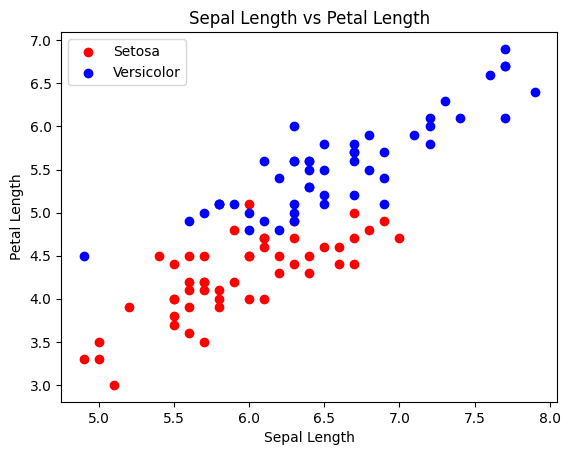

In [49]:
versicolor_label = iris_data.iloc[50:100,4].values    # Changed indices to versicolor
virginica_label = iris_data.iloc[100:150,4].values    # Changed indices to virginica
labels = np.concatenate((versicolor_label, virginica_label))

y = np.where(labels == 1, -1, 1)    # Changed so versicolor = -1, viriginica = 1

X_versicolor = iris_data.iloc[50:100, [0,2]]
X_virginica = iris_data.iloc[100:150, [0,2]]
X = np.concatenate((X_versicolor,X_virginica))

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Versicolor')
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

In [65]:
def fit_pocket(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        W_pocket = np.zeros(1 + X.shape[1])   # Added to store actual pocket
        pocket_errors = X.shape[0]    # Added to cache pocket errors
        errors_ = []
        pocket_errors_ = []    # Added to store pocket errors for final graph
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
              if predict(W, xi) != target:
                  W = W + target * np.append(1,xi)
            # errors on whole dataset
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # consider pocket - NEW
            if errors < pocket_errors:
                pocket_errors = errors
                W_pocket = W
            # -------------------------------------------
            errors_.append(errors)
            pocket_errors_.append(pocket_errors)
            i += 1
            # Modified to reduce graph frequency
            if (i % 50 == 0) or (i == 1):
              print("Iteration: ", i)
              print("Weights: ", W)
              print("Misclassified Samples: ", errors)
              print("Pocket weights: ", W_pocket)    # Added to add plots
              print("Pocket misclassified Samples: ", pocket_errors)    # Added to add plots
              plot_boundary(W,X) # When weights are updated we plot the boundary
        plot_errors(errors_)
        plot_errors(pocket_errors_)    # Added to add plots
        plot_boundary(W_pocket,X)    # Added to add plots

Iteration:  1
Weights:  [ 0.  -0.7  1.3]
Misclassified Samples:  50
Pocket weights:  [ 0.  -0.7  1.3]
Pocket misclassified Samples:  50


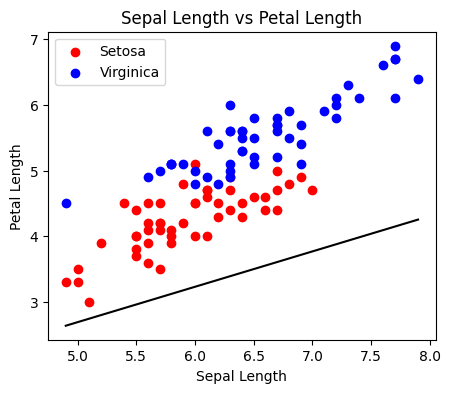

Iteration:  50
Weights:  [  0.  -35.8  51. ]
Misclassified Samples:  29
Pocket weights:  [  0.  -35.3  48.6]
Pocket misclassified Samples:  21


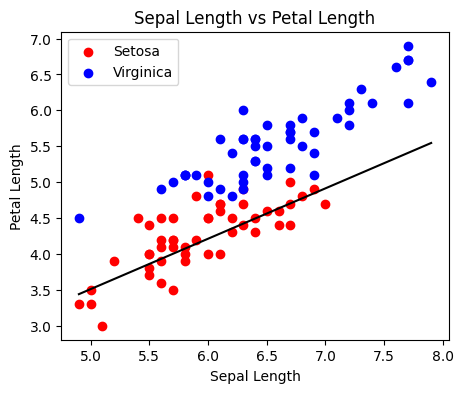

Iteration:  100
Weights:  [ -1.  -59.9  90.4]
Misclassified Samples:  44
Pocket weights:  [ -1.  -47.2  64.1]
Pocket misclassified Samples:  16


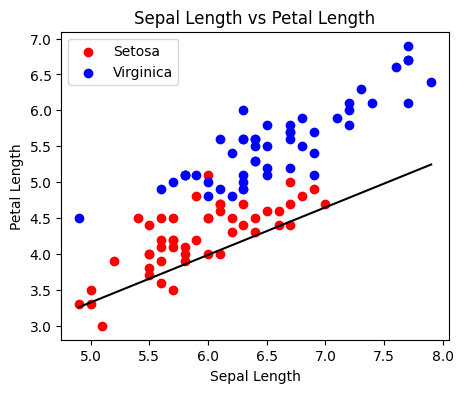

Iteration:  150
Weights:  [ -9.  -80.7 117.9]
Misclassified Samples:  33
Pocket weights:  [ -1.  -47.2  64.1]
Pocket misclassified Samples:  16


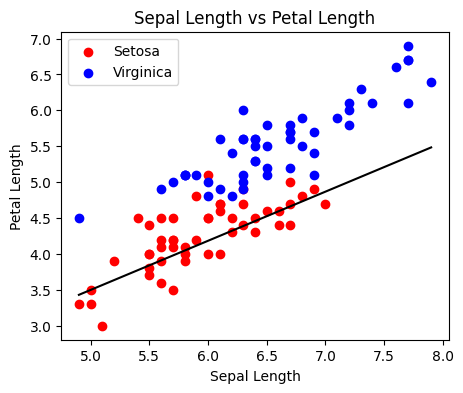

Iteration:  200
Weights:  [-20.  -92.  135.5]
Misclassified Samples:  30
Pocket weights:  [ -1.  -47.2  64.1]
Pocket misclassified Samples:  16


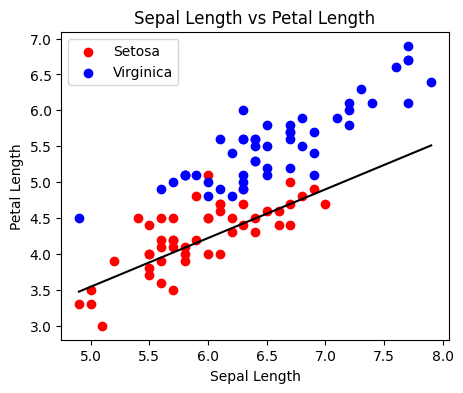

Iteration:  250
Weights:  [ -31.  -100.2  151.7]
Misclassified Samples:  33
Pocket weights:  [ -1.  -47.2  64.1]
Pocket misclassified Samples:  16


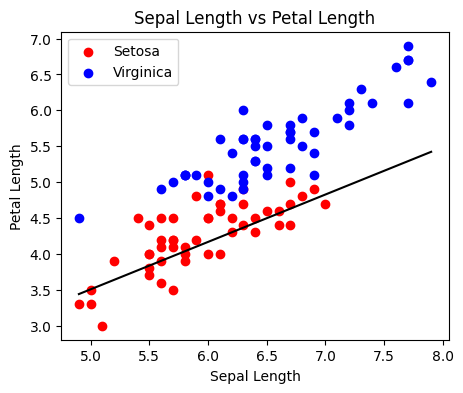

Iteration:  300
Weights:  [ -46.  -108.1  165.5]
Misclassified Samples:  32
Pocket weights:  [ -44.  -111.8  160.2]
Pocket misclassified Samples:  15


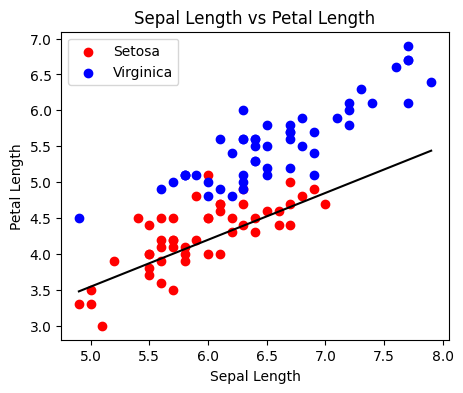

Iteration:  350
Weights:  [ -60.  -114.9  176.9]
Misclassified Samples:  29
Pocket weights:  [ -44.  -111.8  160.2]
Pocket misclassified Samples:  15


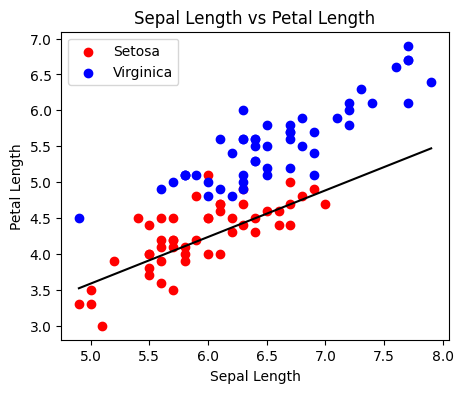

Iteration:  400
Weights:  [ -73.  -119.1  187. ]
Misclassified Samples:  31
Pocket weights:  [ -44.  -111.8  160.2]
Pocket misclassified Samples:  15


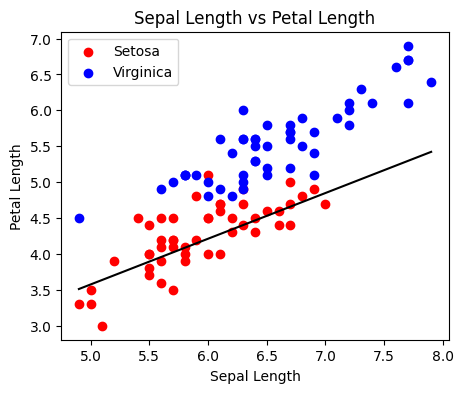

Iteration:  450
Weights:  [ -86.  -126.4  193.2]
Misclassified Samples:  18
Pocket weights:  [ -81.  -127.2  188. ]
Pocket misclassified Samples:  14


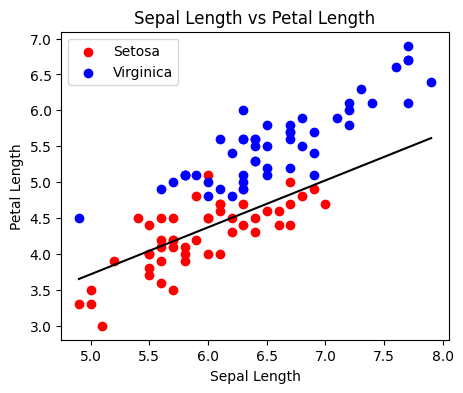

Iteration:  500
Weights:  [ -99.  -127.3  200.7]
Misclassified Samples:  23
Pocket weights:  [ -81.  -127.2  188. ]
Pocket misclassified Samples:  14


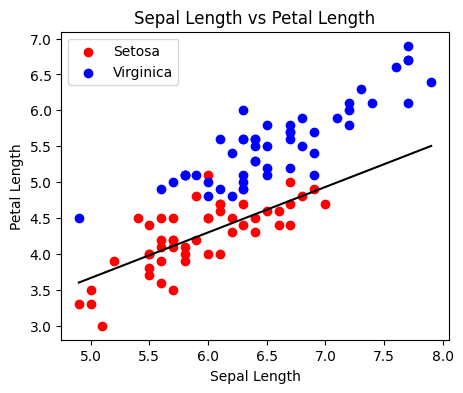

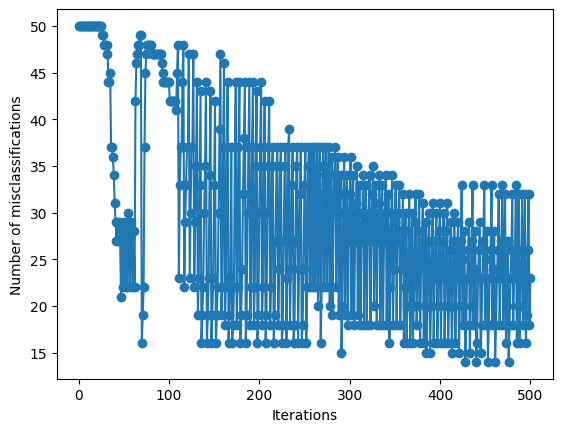

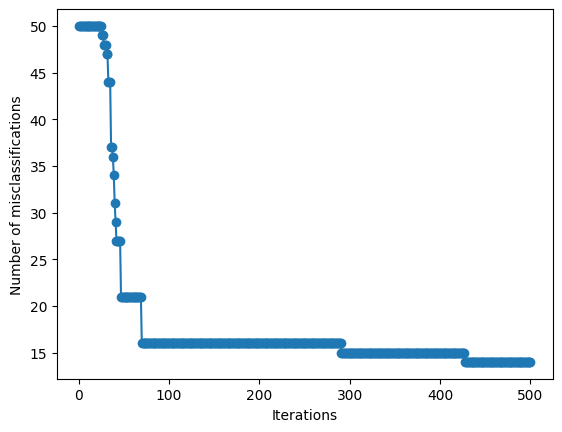

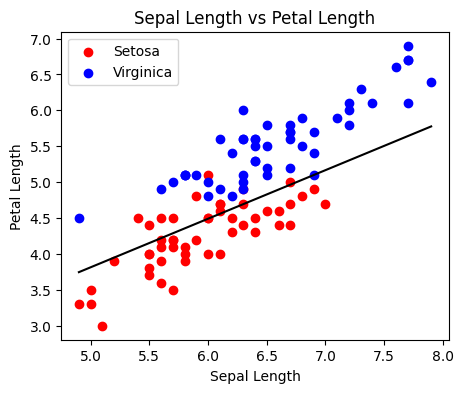

In [66]:
n_iter=500
fit_pocket(n_iter, X, y)